# Plot custom bounding boxes
This notebook covers how to use the image verification engines to plot custom bounding boxes. This can be helpful when you want to verify a provided set of bounding boxes against an image.


## Prerequisites
Before getting started, make sure presidio and the latest version of Tesseract OCR are installed. For detailed documentation, see the [installation docs](https://microsoft.github.io/presidio/installation).

In [ ]:
!pip install presidio_analyzer presidio_anonymizer presidio_image_redactor
!python -m spacy download en_core_web_lg

## 0. Imports and initializations

In [1]:
from PIL import Image
import pydicom
from presidio_image_redactor import ImageAnalyzerEngine, ImagePiiVerifyEngine, DicomImagePiiVerifyEngine
import matplotlib.pyplot as plt

Initialize engines used for image redaction

In [2]:
# Image analyzer engine
image_analyzer_engine = ImageAnalyzerEngine()

# Verification engines
verify_engine = ImagePiiVerifyEngine() # standard images
dicom_verify_engine = DicomImagePiiVerifyEngine() # DICOM images
padding_width = 3

## 1. Example images
In this notebook, we will use the following examples images.

### 1.1 Standard example image

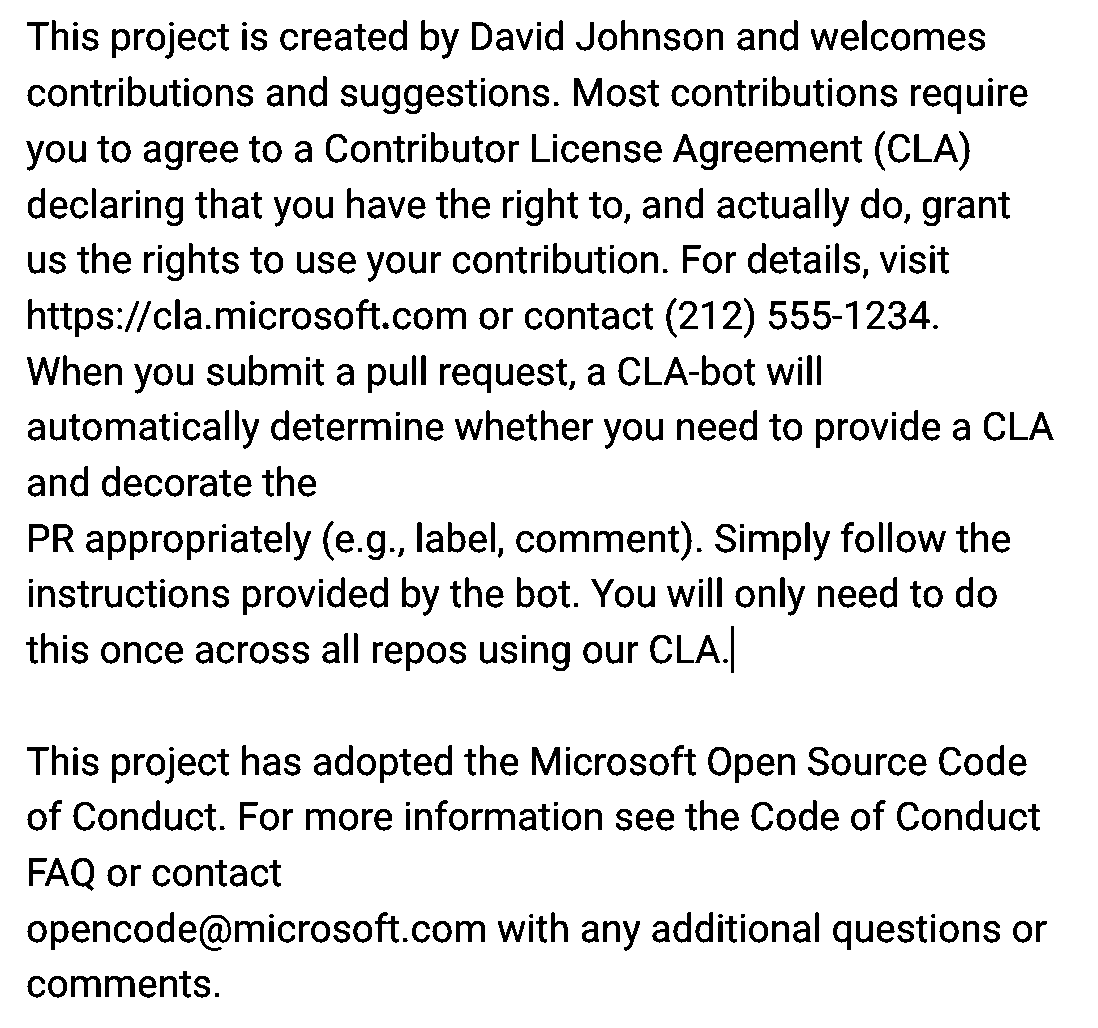

In [3]:
image = Image.open("../../image-redactor/ocr_text.png")
display(image)

And this is what the image looks like with the standard, default behavior of the verification engine.

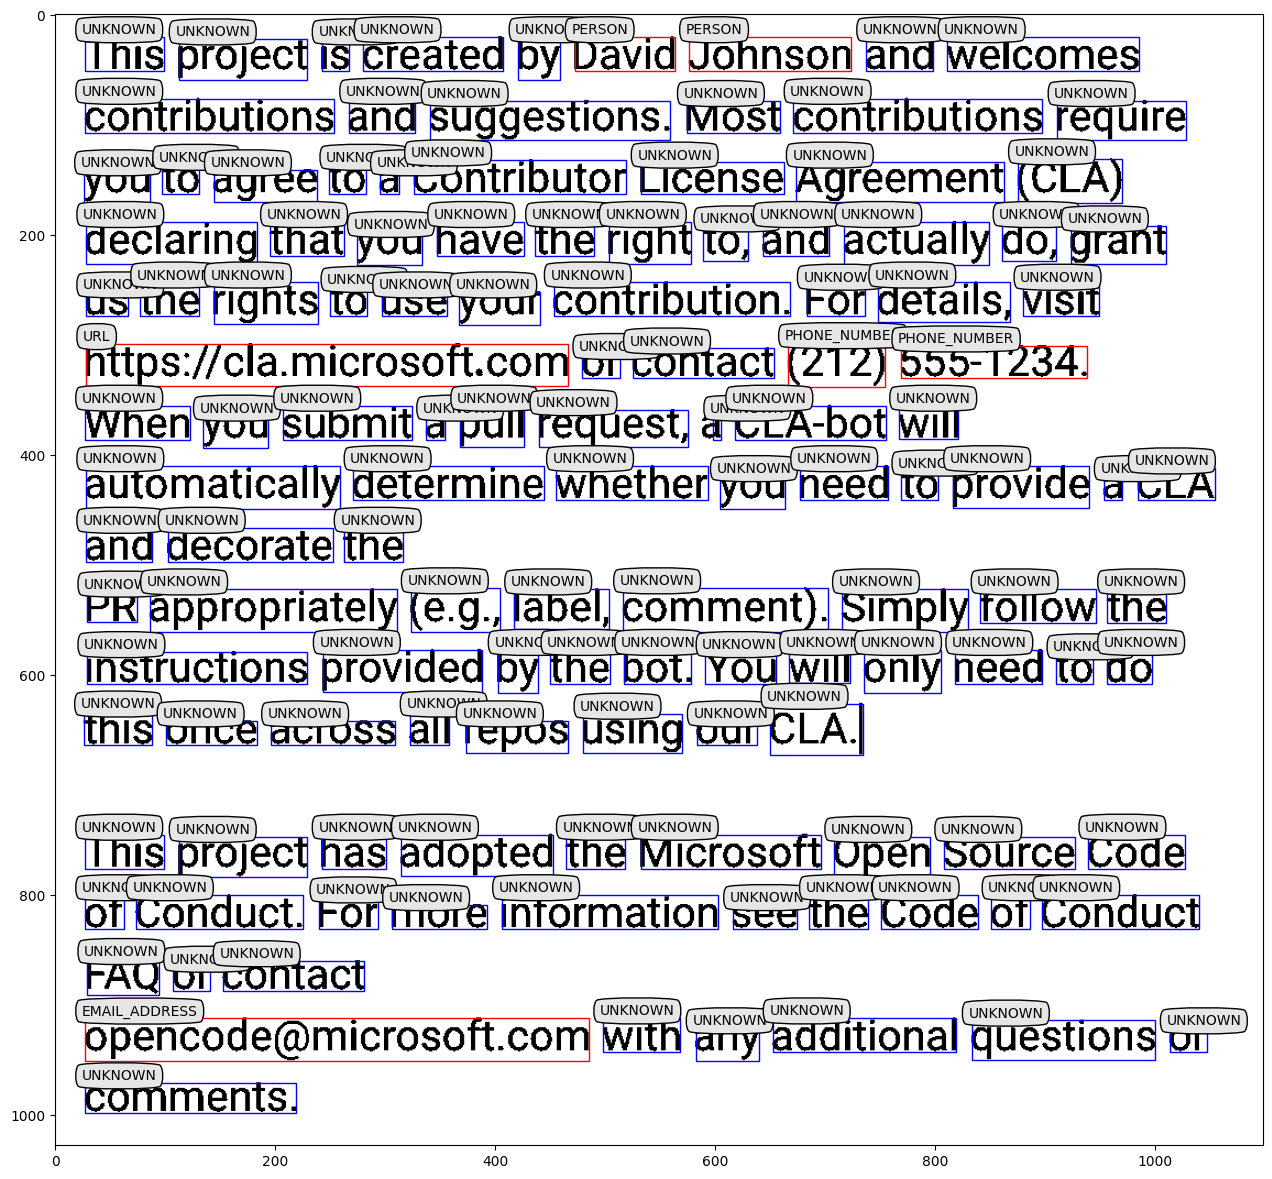

In [4]:
verify_image = verify_engine.verify(image, display_image=True)

### 1.2 DICOM medical image
For more information on DICOM image redaction, please see [example_dicom_image_redactor.ipynb](./example_dicom_image_redactor.ipynb) and the [Image redactor module documentation](../../../image-redactor/index.md).

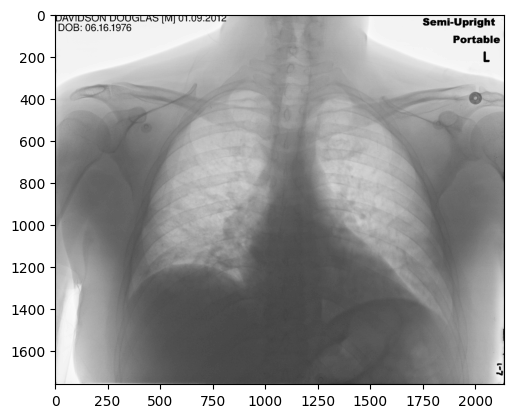

In [5]:
instance = pydicom.dcmread("./sample_data/0_ORIGINAL.dcm")
plt.imshow(instance.pixel_array, cmap="gray")

And this is what the image looks like with the standard, default behavior verification.

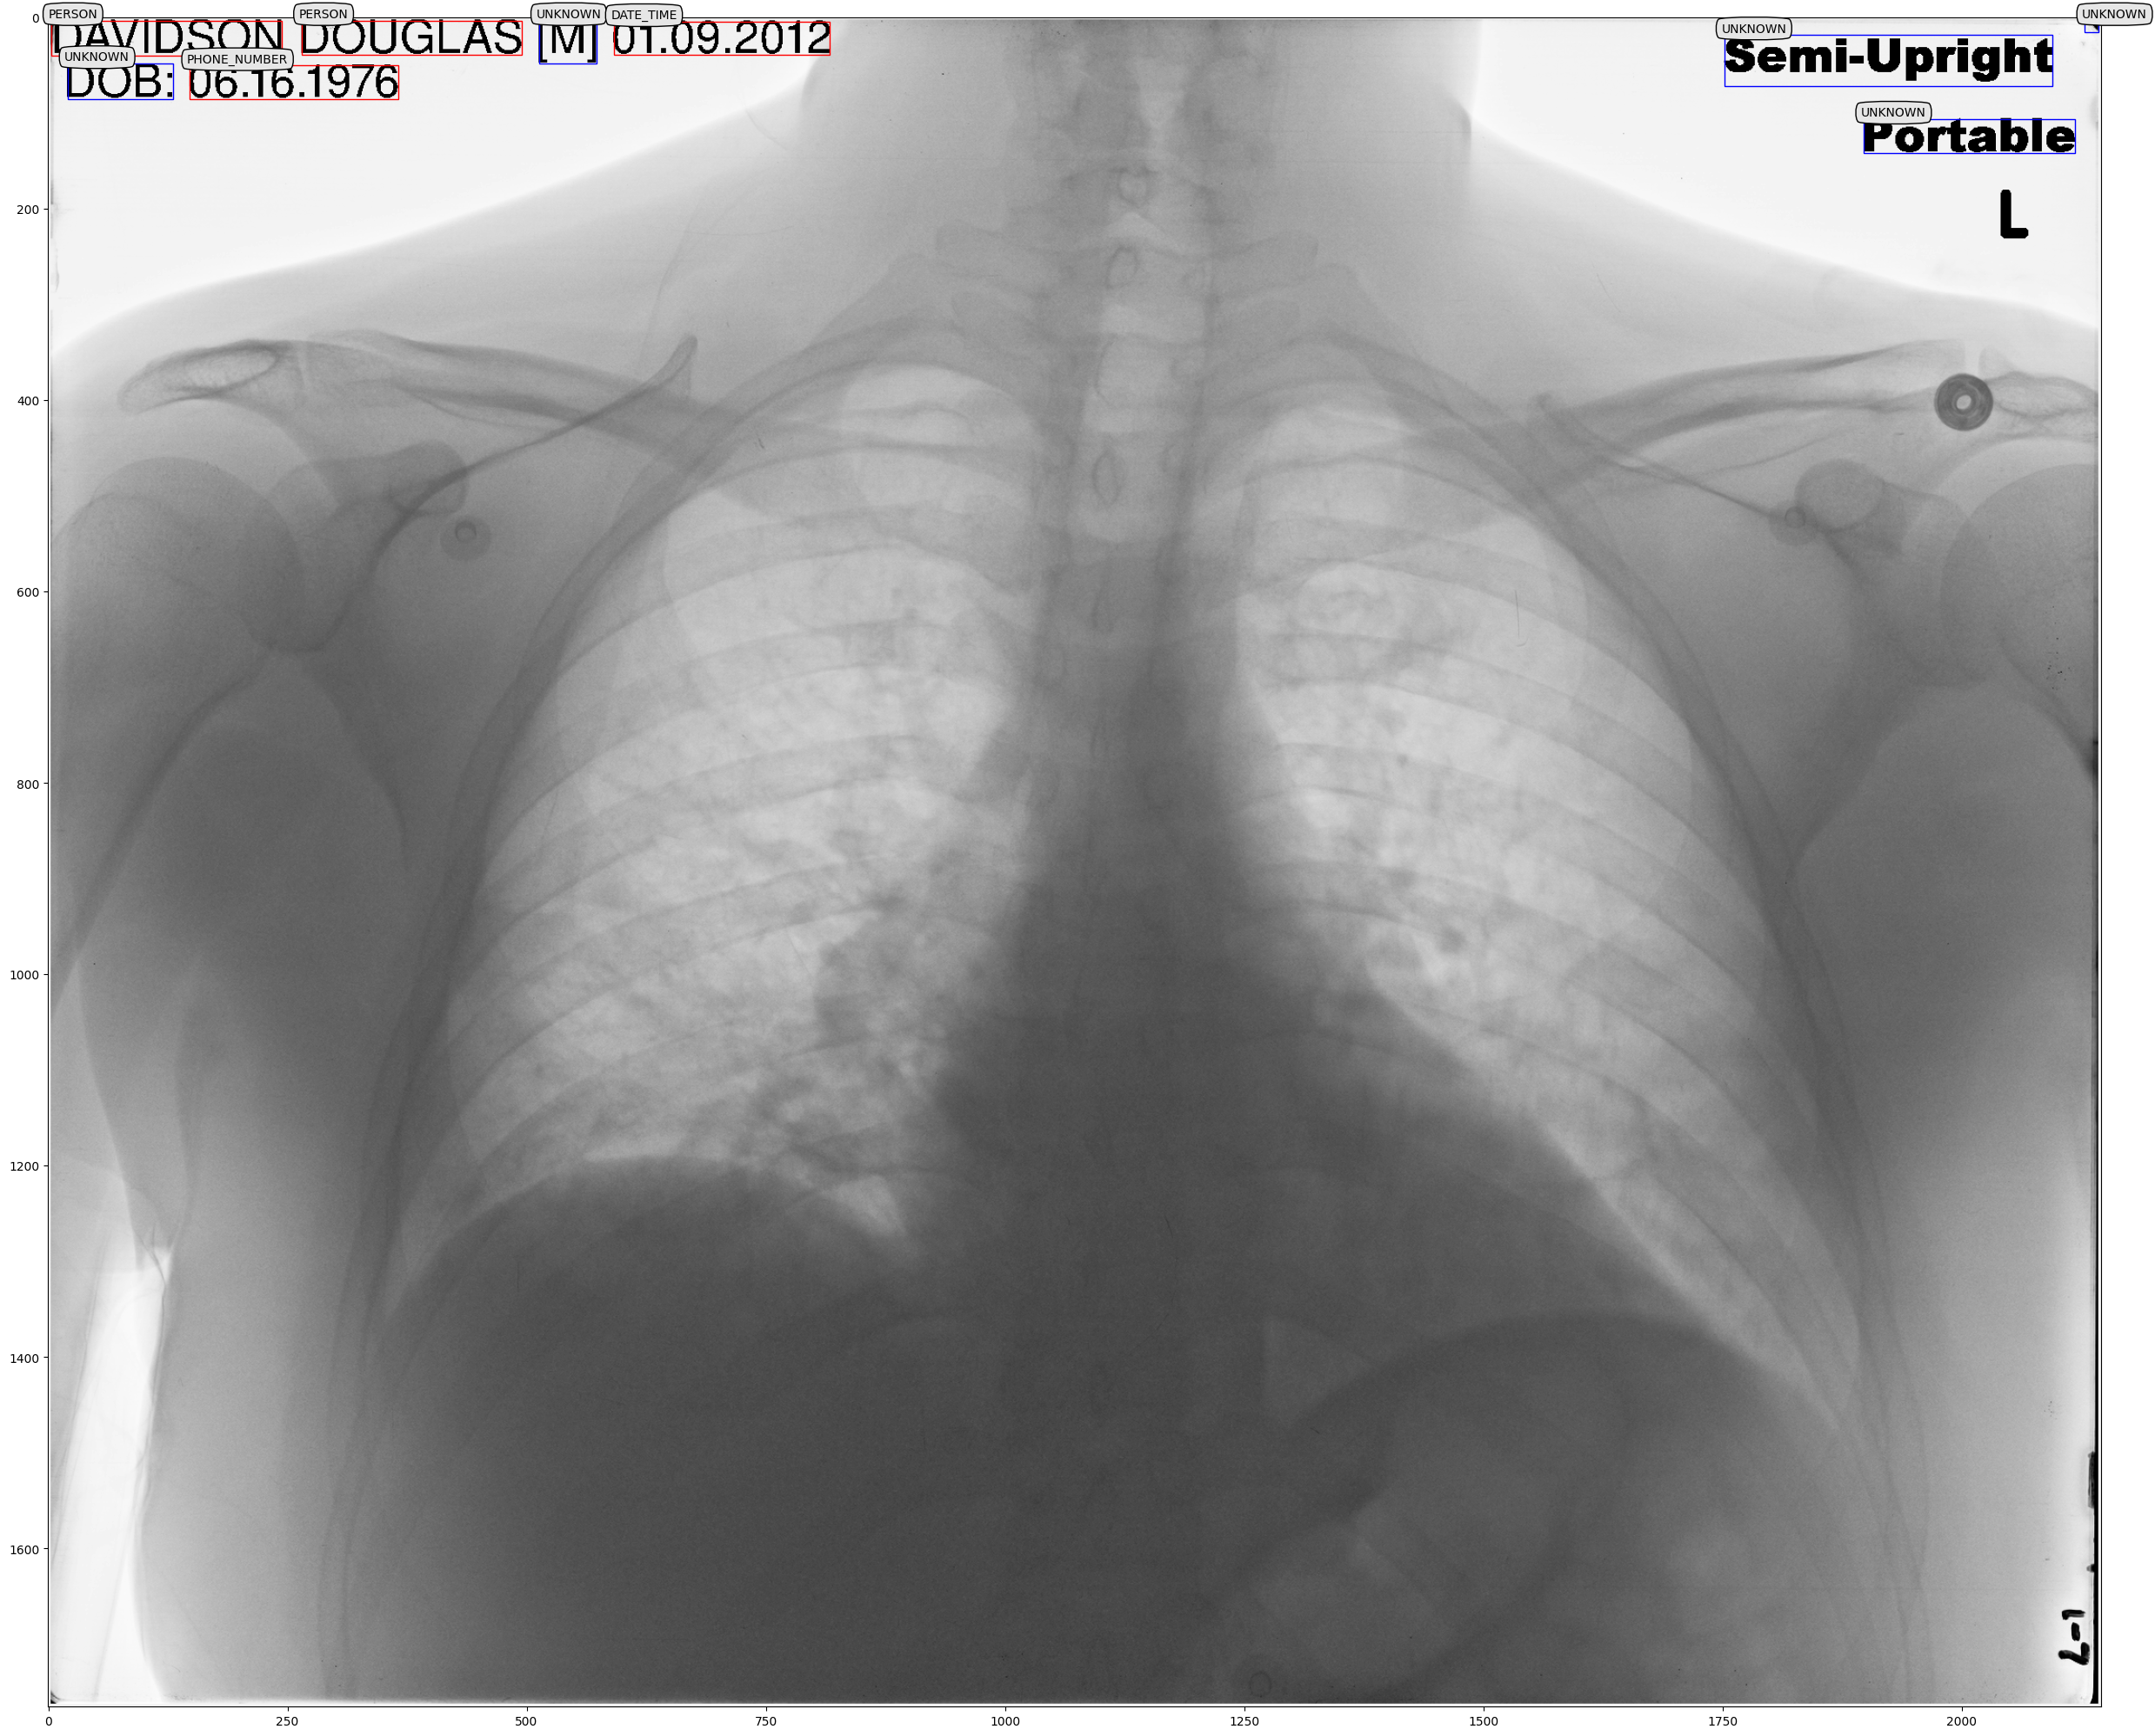

In [6]:
dicom_image, dicom_ocr_bboxes, dicom_analyzer_bboxes = dicom_verify_engine.verify_dicom_instance(
    instance,
    padding_width=padding_width,
    display_image=True
)

In [7]:
len(dicom_ocr_bboxes)

9

In [8]:
len(dicom_analyzer_bboxes)

4

## 2. Plot custom bounding boxes
There may be situations where you want to visually validate whether a set of given bounding boxes match your expectations on an image. In these cases, we can call `ImageAnalyzerEngine.add_custom_bbox()` instead of using the verify methods which include OCR and text analysis.

Let's look at the format of the analyzer results bounding boxes returned by the DICOM verification engine. This the general format expected of custom bounding boxes passed into `add_custom_bbox()`.

In [9]:
type(dicom_analyzer_bboxes)

list

In [10]:
type(dicom_analyzer_bboxes[0])

dict

In [11]:
dicom_analyzer_bboxes[0]

{'entity_type': 'PERSON',
 'score': 0.85,
 'left': 3,
 'top': 3,
 'width': 241,
 'height': 37,
 'is_PII': True}

For our custom bounding boxes, the "entity_type" and "is_PII" fields are optional and "score" is not used. However, the "is_PII" field is helpful in visually identifying which bounding boxes from your given bounding box list are considered PII.

In [12]:
# Example provided bounding box list
given_bboxes = [
    {
        'entity_type': 'PERSON',
         'left': 3,
         'top': 3,
         'width': 241,
         'height': 37,
         'is_PII': True
    },
    {
        'entity_type': 'PERSON',
         'left': 179,
         'top': 150,
         'width': 300,
         'height': 74,
         'is_PII': False
    }
]

Let's plot the given bounding boxes.

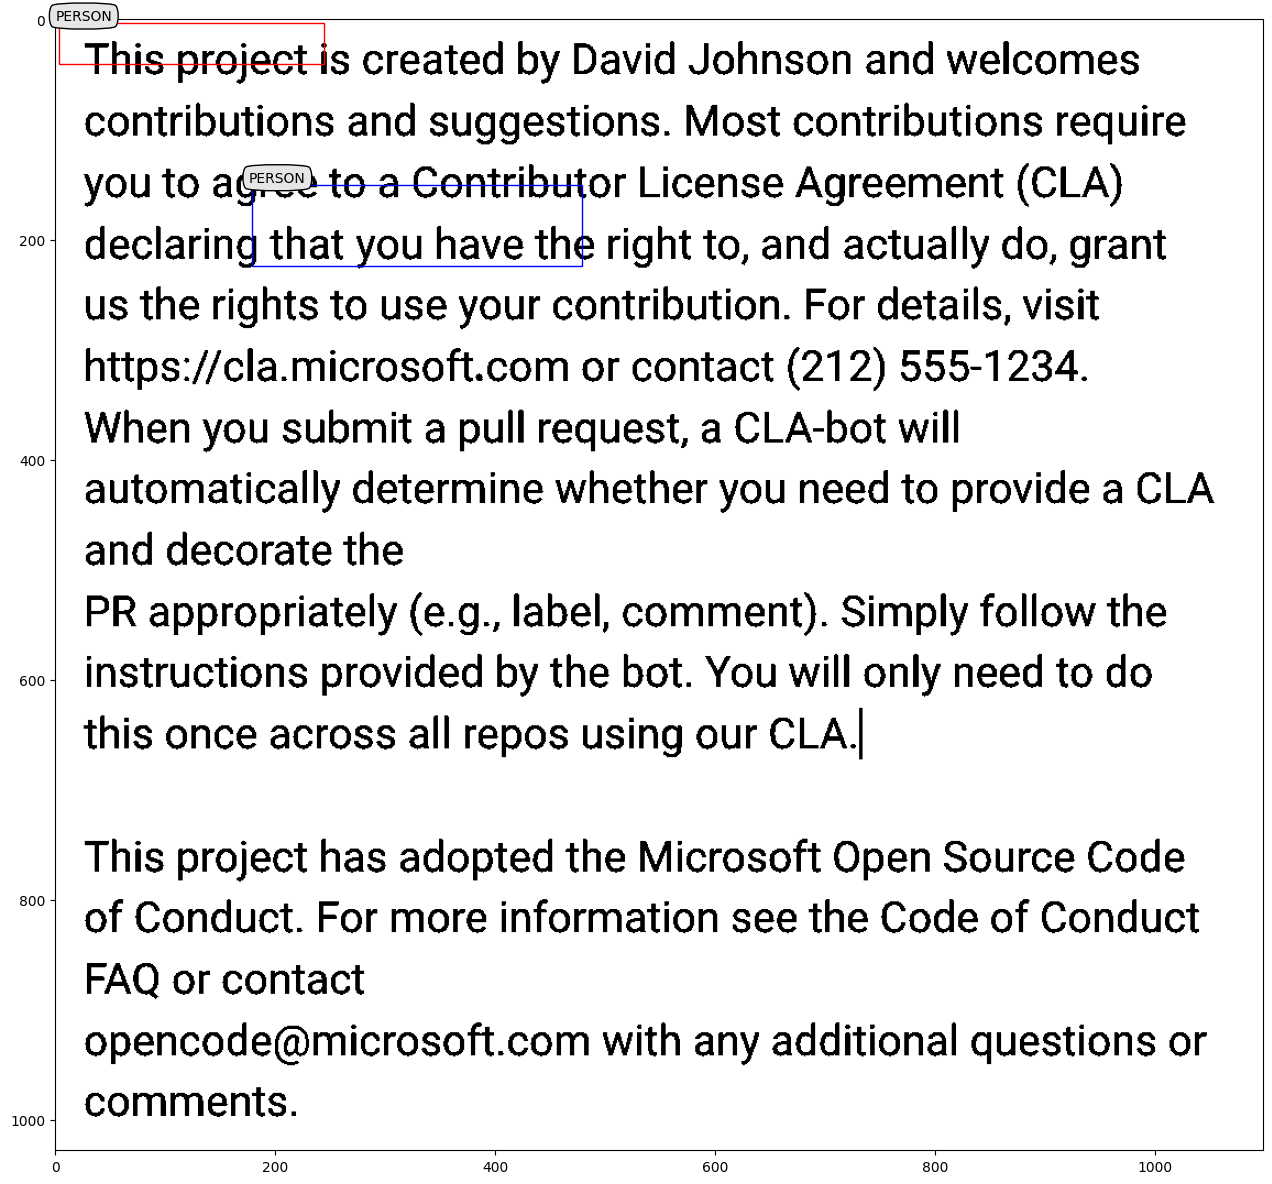

In [13]:
# Let's plot with the given bounding boxes
test_image = image_analyzer_engine.add_custom_bboxes(image, given_bboxes, show_text_annotation=True)

While the placement of our example bounding boxes here is not ideal, this shows how you can easily visualize if a provided set of bounding boxes match your expectations.